<a href="https://colab.research.google.com/github/ibonetc/Finance_ML/blob/main/Predicci%C3%B3nSeriesDeTiempo_Pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo pycaret serie de tiempo

In [ ]:
!pip install pycaret
!pip install markupsafe==2.0.1

In [1]:
import jinja2

In [2]:
from pycaret.utils import enable_colab
enable_colab

<function pycaret.utils.enable_colab>

## Cargar los datos

In [13]:
import pandas as pd
import numpy as np

In [70]:
data = pd.read_csv('AirPassengers.csv')

In [71]:
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [72]:
data['Date'] = pd.to_datetime(data['Month'])
data.head()

,Month,#Passengers,Date
0,1949-01,112,1949-01-01
1,1949-02,118,1949-02-01
2,1949-03,132,1949-03-01
3,1949-04,129,1949-04-01
4,1949-05,121,1949-05-01


Crear un promedio móvil de 12 meses

In [73]:
data['MA12'] = data['#Passengers'].rolling(12).mean()

In [74]:
import plotly.express as px
fig = px.line(data, x="Date", y=["#Passengers", "MA12"], template = 'plotly_dark')
fig.show()

Crear mes y año desde la fecha

In [76]:
data['Month']=data['Date'].dt.month

In [78]:
data['Year'] = data['Date'].dt.year

In [79]:
data

,Month,#Passengers,Date,MA12,Year
0,1,112,1949-01-01,NaN,1949
1,2,118,1949-02-01,NaN,1949
2,3,132,1949-03-01,NaN,1949
3,4,129,1949-04-01,NaN,1949
4,5,121,1949-05-01,NaN,1949
...,...,...,...,...,...
139,8,606,1960-08-01,463.333333,1960
140,9,508,1960-09-01,467.083333,1960
141,10,461,1960-10-01,471.583333,1960
142,11,390,1960-11-01,473.916667,1960


Si tuviéramos horas podríamos sacar la columna de horas

Crear una secuencia de números

In [80]:
data['No'] = np.arange(1,len(data)+1)

In [81]:
data

,Month,#Passengers,Date,MA12,Year,No
0,1,112,1949-01-01,NaN,1949,1
1,2,118,1949-02-01,NaN,1949,2
2,3,132,1949-03-01,NaN,1949,3
3,4,129,1949-04-01,NaN,1949,4
4,5,121,1949-05-01,NaN,1949,5
...,...,...,...,...,...,...
139,8,606,1960-08-01,463.333333,1960,140
140,9,508,1960-09-01,467.083333,1960,141
141,10,461,1960-10-01,471.583333,1960,142
142,11,390,1960-11-01,473.916667,1960,143


Seleccionar las columnas necesarias

In [82]:
data = data[['No', 'Year', 'Month', '#Passengers','Date']] 

In [83]:
data

,No,Year,Month,#Passengers,Date
0,1,1949,1,112,1949-01-01
1,2,1949,2,118,1949-02-01
2,3,1949,3,132,1949-03-01
3,4,1949,4,129,1949-04-01
4,5,1949,5,121,1949-05-01
...,...,...,...,...,...
139,140,1960,8,606,1960-08-01
140,141,1960,9,508,1960-09-01
141,142,1960,10,461,1960-10-01
142,143,1960,11,390,1960-11-01


## Dividir en entrenamiento y prueba

In [84]:
print(min(data['Year']),max(data['Year']))

1949 1960


In [85]:
train = data[data['Year'] < 1960]
test = data[data['Year'] >= 1960]

In [86]:
print(train.shape, test.shape)

(132, 5) (12, 5)


In [95]:
from pycaret.regression import *

In [87]:
s = setup(data = train, test_data = test, target = '#Passengers', 
          fold_strategy = 'timeseries', 
          numeric_features = ['Year', 'No'], 
          ignore_features = ['Date'],
          fold = 3, transform_target = True, session_id = 123)

,Description,Value
0,session_id,123
1,Target,#Passengers
2,Original Data,"(132, 5)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(132, 13)"


## Entrenar el modelo

In [88]:
best = compare_models(sort = 'MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lar,Least Angle Regression,22.3980,923.8651,28.2855,0.5621,0.0878,0.0746,0.0267
lr,Linear Regression,22.3981,923.8747,28.2856,0.5621,0.0878,0.0746,0.9300
huber,Huber Regressor,22.4244,892.2573,27.9475,0.5981,0.0880,0.0749,0.0700
br,Bayesian Ridge,22.4783,932.2165,28.5483,0.5611,0.0884,0.0746,0.0300
ridge,Ridge Regression,23.1976,1003.9423,30.0409,0.5258,0.0933,0.0764,0.0200
lasso,Lasso Regression,38.4188,2413.5096,46.8468,0.0882,0.1473,0.1241,0.0200
en,Elastic Net,40.6486,2618.8753,49.4048,-0.0824,0.1563,0.1349,0.0200
omp,Orthogonal Matching Pursuit,44.3054,3048.2658,53.8613,-0.4499,0.1713,0.1520,0.0433
gbr,Gradient Boosting Regressor,50.1217,4032.0567,61.2306,-0.6189,0.2034,0.1538,0.0433
rf,Random Forest Regressor,52.7754,4705.6863,65.6728,-0.7962,0.2148,0.1592,0.3100


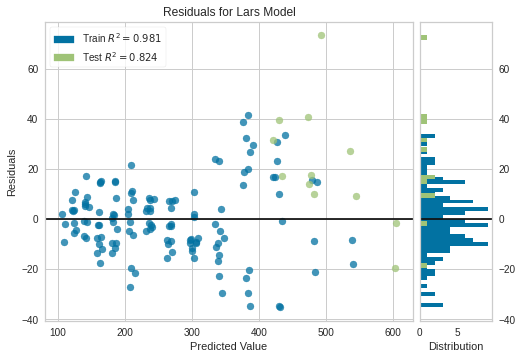

In [90]:
plot_model(best, plot = 'residuals')

In [91]:
plot_model(best, plot = 'insample')

ValueError: ignored

In [92]:
prediction_holdout = predict_model(best);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Least Angle Regression,25.0714,972.2733,31.1813,0.8245,0.0692,0.0571


## Predicción del modelo sobre todos los datos
Generar la predicción sobre los datos originales

In [63]:
predictions = predict_model(best, data=data)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Least Angle Regression,12.5381,278.7548,16.696,0.9805,0.0538,0.0447


In [65]:
fig = px.line(predictions, x='Date', y=["#Passengers", "Label"], template = 'plotly_dark')
fig.add_vrect(x0="1960-01-01", x1="1960-12-01", fillcolor="grey", opacity=0.25, line_width=0)
fig.show()

## Construyendo modelo final

In [66]:
final_best = finalize_model(best)

## Predicción del modelo

In [67]:
future_dates = pd.date_range(start = '1961-01-01', end = '1965-01-01', freq = 'MS')
future_df = pd.DataFrame()
future_df['Month'] = [i.month for i in future_dates]
future_df['Year'] = [i.year for i in future_dates]    
future_df['No'] = np.arange(145,(145+len(future_dates)))
future_df.head()

,Month,Year,No
0,1,1961,145
1,2,1961,146
2,3,1961,147
3,4,1961,148
4,5,1961,149


In [68]:
predictions_future = predict_model(final_best, data=future_df)
predictions_future.head()

,Month,Year,No,Label
0,1,1961,145,486.278268
1,2,1961,146,482.208187
2,3,1961,147,550.485967
3,4,1961,148,535.187177
4,5,1961,149,538.923789


In [69]:
concat_df = pd.concat([data,predictions_future], axis=0)
concat_df_i = pd.date_range(start='1949-01-01', end = '1965-01-01', freq = 'MS')
concat_df.set_index(concat_df_i, inplace=True)
fig = px.line(concat_df, x=concat_df.index, y=["#Passengers", "Label"], template = 'plotly_dark')
fig.show()